In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pip install missingno
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df=pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
round((df.isnull().sum() / df.count() * 100), 2)

CRIM       4.12
ZN         4.12
INDUS      4.12
CHAS       4.12
NOX        0.00
RM         0.00
AGE        4.12
DIS        0.00
RAD        0.00
TAX        0.00
PTRATIO    0.00
B          0.00
LSTAT      4.12
MEDV       0.00
dtype: float64

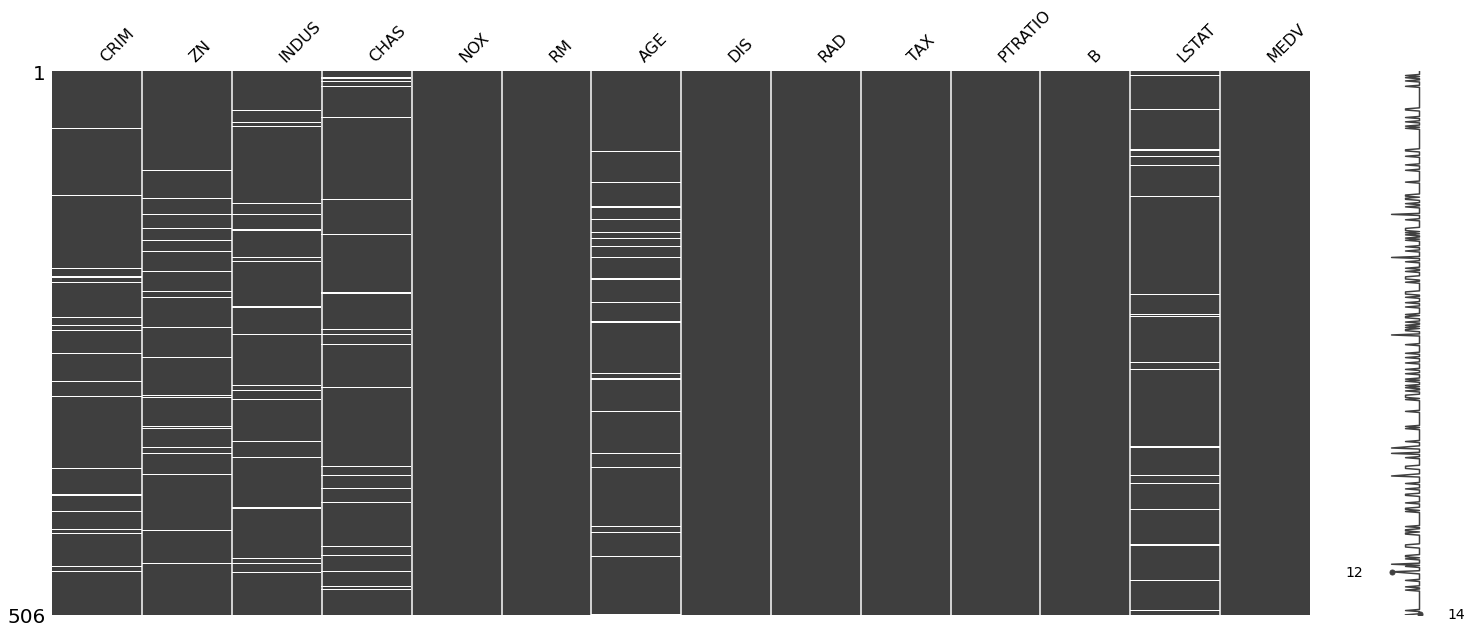

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
imputer = KNNImputer()
dfi = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
dfi

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.20,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.90,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.10,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.80,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.20,6.0622,3.0,222.0,18.7,396.90,7.56,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.10,2.4786,1.0,273.0,21.0,391.99,9.38,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.70,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.00,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.30,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


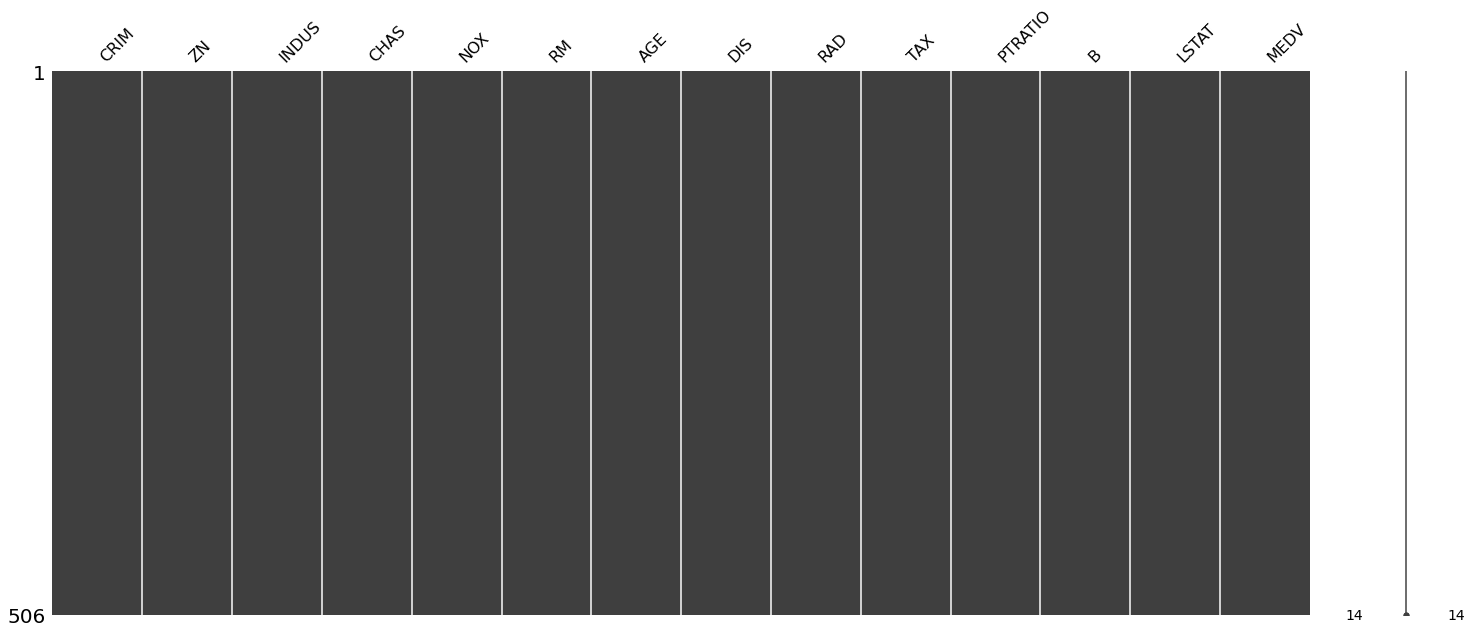

In [ ]:
msno.matrix(dfi)
plt.show()

In [ ]:
X=dfi.drop(columns='MEDV')
Y=dfi.MEDV

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=1)

In [ ]:
SS=StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [ ]:
model=Sequential()
model.add(Dense(13, activation= 'relu', input_dim =13))
model.add(Dense(26, activation ='relu'))
model.add(Dense(26, activation ='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(optimizer='nadam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 26)                364       
                                                                 
 dense_2 (Dense)             (None, 26)                702       
                                                                 
 dense_3 (Dense)             (None, 1)                 27        
                                                                 
Total params: 1,275
Trainable params: 1,275
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, batch_size=10, epochs=100)

Epoch 1/100
38/38 [==============================] - 2s 2ms/step - loss: 549.2158
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 439.2669
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 219.3404
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 63.2223
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 36.7009
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 29.0362
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 24.7849
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 22.7982
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 21.2808
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 20.4317
Epoch 11/100
38/38 [==============================] - 0s 2ms/step - loss: 19.7563
Epoch 12/100
38/38 [==============================] - 0s 2ms/step - loss: 18.9660
Epoch 13/100
38/38 [==

In [ ]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
print('MAE:', mean_absolute_error(Y_test,Y_pred))
print('MSE:', mean_squared_error(Y_test,Y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('R2_Score:', r2_score(Y_test,Y_pred))

MAE: 2.252190091290811
MSE: 9.502839826263827
RMSE: 3.0826676477142043
R2_Score: 0.9040683801694077


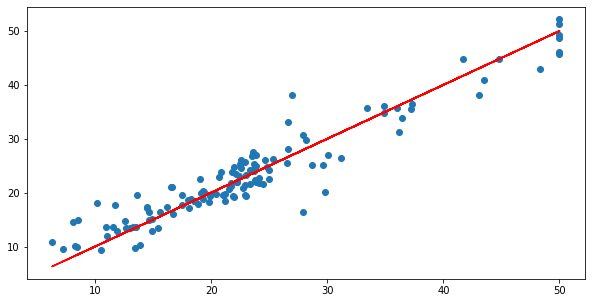

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(Y_test,Y_pred)
plt.plot(Y_test,Y_test,'r')
plt.show()